<a href="https://colab.research.google.com/github/Therezaclm/Data-Science/blob/main/Previs%C3%A3o_de_Bullying_Squad_Carmen_Portinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bootcamp Data Analytics 2023** - ***SQUAD Carmen Portinho***

#### *Desafio Final: Previsão de Bullying*


**Sobre o conjunto de dados**

O Global School-Based Student Health Survey (GSHS) é uma pesquisa escolar que usa um questionário autoaplicável para obter dados sobre o comportamento de saúde dos jovens e fatores de proteção relacionados às principais causas de morbidade e mortalidade.
A pesquisa foi realizada na Argentina em 2018. Um total de 56.981 alunos participaram.
A taxa de resposta da escola foi de 86%, a taxa de resposta do aluno foi de 74% e a taxa de resposta geral foi de 63%. 

**Sobre o desenvolvimento de um modelo de previsão de bullying**

A partir do GHSH, foram selecionadas as perguntas da pesquisa relacionadas ao bullying. Isto com o objetivo de desenvolver um modelo que permita preveni-la. Alguns dos indicadores de bullying têm sido relacionados a sentimentos de solidão, falta de amigos íntimos, má comunicação com os pais, ausência nas aulas. (por exemplo, Nansel et al. Comportamentos de bullying entre jovens americanos: Prevalência e associação com ajustamento psicossocial) Da mesma forma, jovens identificados por agressores como abaixo do peso, acima do peso e obesos foram vítimas de bullying.

**Para responder esse desafio: A base de dados contém as seguintes
informações:**

● record : código identificador

● Bullied_on_school_property_in_past_12_months: Sofreu bullying na propriedade
da escola nos últimos 12 meses

● Bullied_on_school_property_in_past_12_months: sofreu bullying fora da
propriedade da escola nos últimos 12_meses

  ● Cyber_bullied_in_past_12_months: Cyberbullying nos últimos 12 meses

  ● Custom_Age: Idade

  ● Sex: Sexo

  ● Physically_attacked: Ataque físico

  ● Physical_fighting: Briga Física

  ● Felt_lonely: Sentiu-se sozinho

  ● Close_friends: Amigos próximos

  ● Miss_school_no_permission: Faltam à escola sem permissão

  ● Other_students_kind_and_helpful: Outros alunos gentis e prestativos

  ● Parents_understand_problems: Os pais entendem os problemas

  ● Most_of_the_time_or_always_felt_lonely: Na maioria das vezes ou sempre se
  sentiu sozinho

  ● Missed_classes_or_school_without_permission: Perdeu aulas ou escola sem
  permissão

  ● Were_underweight: Estava abaixo do peso

  ● Were_overweight: Estava acima do peso

  ● Were_obese: Estava obeso






### **Análise dos dados:**

1 - *Analise todas as variáveis. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?*

2 - *Faça um comparativo dos bullyings sofridos por gênero, plote os resultados
(histograma e boxplot).*

3 - *Qual a média de idade das pessoas que sofreram bullying, análise outras
variáveis não relevantes como (felt_lonely, close_friends e outras) podem ter
influenciado ataques de bullying? O que pode ser representado como principal
motivo de bullying?*


### **Modelagem:**

4 - *Construa um modelo de regressão linear que explique o bullying virtual e
offline.*

5 - *A partir do modelo, suponha que você esteja prestando assessoria a Secretaria da Educação e você tem como missão prever a proporção de ataques de bullying, analisando tanto os ataques físicos e ciberataques, diante do resultado. Proponha uma solução a Secretaria da Educação para que possa diminuir o bullying.*

### Importação das bibliotecas

In [ ]:
#### Importando os pacotes que serão utilizados 
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt ## graficos
import seaborn as sns ## graficos
from scipy.stats import skewnorm ## Gerar distribuicoes assimétricas, etc (utilizado na montagem do dataset)
from google.colab import drive ## conectar com o google drive para ler seus arquivos
import statsmodels.api as sm ## para rodar a regressao
from sklearn.model_selection import train_test_split ## separando treino e teste
from sklearn.feature_selection import RFE ## selecao de features
from sklearn import  linear_model ## para rodar a regressao (outra possibilidade)
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Importação da base de dados

In [ ]:
# # conectar ao drive, onde está o dataset
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# importando o diretório onde está o dataset
# df = pd.read_csv("/content/drive/MyDrive/WoMakersCode - formação em Data Analytics/Bullying_2018.csv", sep=';')
df = pd.read_csv("Bullying_2018.csv", sep=';')

### Primeiras impressões da base de dados

In [ ]:
print('A base de dados contém, ' + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas.')

A base de dados contém, 56981 linhas e 18 colunas.


In [ ]:
df.info()
# temos colunas do tipo int64 e object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [ ]:
# Primeiro será avaliado a qualidade dos dados presentes, e sua integridade (% de valores nulos dentro de cada variável)
pd.concat([df.isna().sum(),
           round(df.isna().sum()*100/len(df),2)],
          axis=1,keys=["QTD", "PERCENT%"])
# a primeira vista, a base de dados não contém nenhum número nulo

,QTD,PERCENT%
record,0,0.00000
Bullied_on_school_property_in_past_12_months,0,0.00000
Bullied_not_on_school_property_in_past_12_months,0,0.00000
Cyber_bullied_in_past_12_months,0,0.00000
Custom_Age,0,0.00000
Sex,0,0.00000
Physically_attacked,0,0.00000
Physical_fighting,0,0.00000
Felt_lonely,0,0.00000
Close_friends,0,0.00000


In [ ]:
# verificando a quantidade de linhas duplicadas
duplicatas = df.duplicated()
n_duplicatas = duplicatas.sum()
print(f"Há {n_duplicatas} linhas duplicadas no DataFrame.")

Há 0 linhas duplicadas no DataFrame.


In [ ]:
# verificando as primeiras 10 linhas do dataframe
colunas = df.columns

valores = np.array(df.Cyber_bullied_in_past_12_months.unique())

##print(valores)
display(df.head(10))

# olhando as linhas da base de dados, vemos que ela contém regristros em branco.

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,,,
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,,,
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,,,
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,,,


## **Análise dos dados (PPDAC)**


### Integridade dos dados

***Existem códigos duplicados na variável record (id)?***

In [ ]:
# verificando se há códigos duplicados na variável "record"
duplicates = df["record"].duplicated().sum()

# imprimindo o número de códigos duplicados
print("Número de códigos duplicados na variável 'record':", duplicates)

Número de códigos duplicados na variável 'record': 0


In [ ]:
# ou
df.duplicated(subset='record').any()
# não temos duplicidade

False

***O número de linhas do banco de dados reflete N = 56.981 participantes?***

Não podemos afirmar com certeza que o número de linhas do banco de dados reflete N = 56.981 participantes, pois não sabemos se todos os participantes responderam todas as perguntas do questionário. Podemos afirmar que o número máximo de participantes é 56.981, já que esse é o número total de registros no conjunto de dados.

***Quais são os tipos de variáveis do banco de dados (e.g. categóricos[binárias ou não], numéricos)?***

***Como estão os missings por variável?***

In [ ]:
# colocando nan em todos os registros em branco
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
# contando valores nulos por coluna
null_counts = df.isnull().sum()

# imprimindo valores nulos por coluna
print("Valores nulos por coluna:")
print(null_counts)

Valores nulos por coluna:
record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                               

***Quais são as características dos participantes da amostra?***

Quantidade total de participantes:

In [ ]:
print("Quantidade total de participantes:", len(df))

Quantidade total de participantes: 56981


Frequência de cada valor (incluindo os valores ausentes) para as variáveis categóricas.

In [ ]:
# lista de variáveis categóricas
categorical_cols = ['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months',
                    'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex', 'Physically_attacked',
                    'Physical_fighting', 'Felt_lonely', 'Close_friends', 'Miss_school_no_permission',
                    'Other_students_kind_and_helpful', 'Parents_understand_problems',
                    'Most_of_the_time_or_always_felt_lonely', 'Missed_classes_or_school_without_permission',
                    'Were_underweight', 'Were_overweight', 'Were_obese']

# loop para obter a contagem e porcentagem de cada variável categórica
for col in categorical_cols:
    counts = df[col].value_counts(dropna=False)
    perc = df[col].value_counts(normalize=True, dropna=False) * 100
    perc = perc.apply(lambda x: "{:.2f}%".format(x))
    table = pd.concat([counts, perc], axis=1)
    table.columns = ["Contagem", "Porcentagem (%)"]
    print(f"Quantidade de participantes por {col}:")
    print(table)
    print()


Quantidade de participantes por Bullied_on_school_property_in_past_12_months:
     Contagem Porcentagem (%)
No      43839          76.94%
Yes     11903          20.89%
NaN      1239           2.17%

Quantidade de participantes por Bullied_not_on_school_property_in_past_12_months:
     Contagem Porcentagem (%)
No      44263          77.68%
Yes     12229          21.46%
NaN       489           0.86%

Quantidade de participantes por Cyber_bullied_in_past_12_months:
     Contagem Porcentagem (%)
No      44213          77.59%
Yes     12197          21.41%
NaN       571           1.00%

Quantidade de participantes por Custom_Age:
                         Contagem Porcentagem (%)
14 years old                12946          22.72%
15 years old                12812          22.48%
16 years old                11738          20.60%
13 years old                10574          18.56%
17 years old                 8227          14.44%
18 years old or older         383           0.67%
12 years old      

*- O número de participantes que relataram ter sofrido bullying na escola nos últimos 12 meses foi de 20,89%, enquanto 76,94% relataram que não sofreram bullying;*

*- O número de participantes que relataram ter sofrido bullying fora da escola nos últimos 12 meses foi de 21,46%, enquanto 77,68% relataram que não sofreram bullying;* 

*- A maioria dos participantes (mais de 50%) era do sexo feminino, enquanto cerca de 48% eram do sexo masculino;*

*- Quase um quarto dos participantes (22,72%) tinha 14 anos de idade, enquanto apenas 0.67% tinha 18 anos ou mais;*

*- Por volta de 80% dos participantes nunca foram fisicamente atacados ou lutaram fisicamente;*

*- Mais de 67% dos participantes tinham três ou mais amigos próximos;*

*- Cerca de 22% dos participantes relataram que seus pais sempre entendem seus problemas, enquanto 21% relataram que nunca entendem;* 

*- Além disso, cerca de 16% dos participantes sempre se sentiam sozinhos.*

### Realizando transformações necessárias

*Transformando variáveis categóricas em numéricas*

In [ ]:
#Transformando categorias binarias de "Yes = 1" e "No = 0" com o replace

cat_binarias = ['Bullied_on_school_property_in_past_12_months', 
               'Bullied_not_on_school_property_in_past_12_months', 
               'Cyber_bullied_in_past_12_months',
                'Most_of_the_time_or_always_felt_lonely',
                'Missed_classes_or_school_without_permission',
                'Were_underweight',
                'Were_overweight',
                'Were_obese']
df[cat_binarias] = df[cat_binarias].replace({'Yes': 1, 'No': 0})

df.head(10)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,1.00000,1.00000,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,1.00000,1.00000,NaN,NaN,NaN
1,2,0.00000,0.00000,0.00000,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,0.00000,0.00000,NaN,NaN,NaN
2,3,0.00000,0.00000,0.00000,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,0.00000,0.00000,0.00000,0.00000,0.00000
3,4,0.00000,0.00000,0.00000,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,0.00000,0.00000,0.00000,0.00000,0.00000
4,5,0.00000,0.00000,0.00000,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,0.00000,0.00000,NaN,NaN,NaN
5,6,0.00000,0.00000,0.00000,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,0.00000,0.00000,0.00000,0.00000,0.00000
6,7,0.00000,0.00000,0.00000,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,0.00000,0.00000,NaN,NaN,NaN
7,8,0.00000,0.00000,0.00000,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,0.00000,0.00000,NaN,NaN,NaN
8,9,0.00000,0.00000,0.00000,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,0.00000,1.00000,NaN,NaN,NaN
9,10,1.00000,0.00000,0.00000,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,1.00000,0.00000,NaN,NaN,NaN


In [ ]:
## Transformando as variáveis categóricas das colunas "Felt_lonely', 'Other_students_kind_and_helpful','Parents_understand_problems"
## em númericas, usando a relação: "Never: 1, Rarely: 2, Sometimes: 3, Most of the time: 4, Always: 5".

categoricas = ['Felt_lonely', 
               'Other_students_kind_and_helpful',
               'Parents_understand_problems']
df[categoricas] = df[categoricas].replace({'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Most of the time': 4, 'Always': 5})

valores = np.array(df.Close_friends.unique())
print(valores)

['2' '3 or more' '0' nan '1']


In [ ]:
### Tranformando a variável da coluna "Close friends" de "3 or more" para uma variável numérica "3"

df['Close_friends'] = df['Close_friends'].replace({'3 or more': 3, '2':2, '0':0,'1':1})

valores = np.array(df.Close_friends.unique())
print(valores)



[ 2.  3.  0. nan  1.]


In [ ]:
## Transformando as variáveis categóricas da coluna "Miss_school_no_permission"
## em númericas, usando a relação: "0 days: 1, 1 or 2 days: 2, 3 to 5 days: 3, 6 to 9 days: 4, 10 or more days: 5"

df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace({'0 days': 1, '1 or 2 days': 2, '3 to 5 days': 3, '6 to 9 days': 4, '10 or more days': 5})

valores = np.array(df.Miss_school_no_permission.unique())
print(valores)

[ 5.  1.  4.  3. nan  2.]


In [ ]:
#Transformando categoria da idade
df['Custom_Age'] = df['Custom_Age'].replace({   
    '13 years old': 13,'14 years old': 14, '16 years old': 16,'12 years old': 12, '15 years old':15,
     '11 years old or younger':11, '17 years old': 17,'18 years old or older': 18
})

valores = np.array(df.Custom_Age.unique())
print(valores)

[13. 14. 16. 12. 15. 11. 17. nan 18.]


In [ ]:
#Transformando categoria de ataque físico e briga física
categorias = ['Physically_attacked', 'Physical_fighting']
df[categorias] = df[categorias].replace({'0 times': 0, '1 time': 1, '2': 2, '2 or 3 times': 2, '4 or 5 times': 3, 
                                               '6 or 7 times': 4, '8 or 9 times': 5, '10 or 11 times': 6, '12 or more times': 7, '0 ti': 0
                                                })
valores = np.array(df.Physical_fighting.unique())
print(valores)

df

[ 0.  2.  1.  3.  4.  5.  6. nan  7.]


,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,1.00000,1.00000,NaN,13.00000,Female,0.00000,0.00000,5.00000,2.00000,5.00000,1.00000,5.00000,1.00000,1.00000,NaN,NaN,NaN
1,2,0.00000,0.00000,0.00000,13.00000,Female,0.00000,0.00000,1.00000,3.00000,1.00000,3.00000,5.00000,0.00000,0.00000,NaN,NaN,NaN
2,3,0.00000,0.00000,0.00000,14.00000,Male,0.00000,0.00000,1.00000,3.00000,1.00000,3.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,4,0.00000,0.00000,0.00000,16.00000,Male,0.00000,2.00000,1.00000,3.00000,1.00000,3.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000
4,5,0.00000,0.00000,0.00000,13.00000,Female,0.00000,0.00000,2.00000,3.00000,1.00000,4.00000,4.00000,0.00000,0.00000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,57091,0.00000,1.00000,0.00000,16.00000,Male,0.00000,3.00000,3.00000,3.00000,1.00000,3.00000,3.00000,0.00000,0.00000,0.00000,1.00000,0.00000
56977,57092,0.00000,0.00000,0.00000,16.00000,Male,0.00000,0.00000,2.00000,1.00000,1.00000,3.00000,1.00000,0.00000,0.00000,NaN,NaN,NaN
56978,57093,0.00000,0.00000,0.00000,16.00000,Male,0.00000,0.00000,3.00000,3.00000,1.00000,2.00000,3.00000,0.00000,0.00000,NaN,NaN,NaN
56979,57094,0.00000,1.00000,0.00000,16.00000,Female,0.00000,0.00000,3.00000,2.00000,1.00000,4.00000,2.00000,0.00000,0.00000,NaN,NaN,NaN


In [ ]:
# análise comparativa do bullying dentro e fora da escola
bullying_off = ['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months']

for col in bullying_off:
    counts = df[col].value_counts(dropna=False)
    perc = df[col].value_counts(normalize=True, dropna=False) * 100
    perc = perc.apply(lambda x: "{:.2f}%".format(x))
    table = pd.concat([counts, perc], axis=1)
    table.columns = ["Contagem", "Porcentagem (%)"]
    print(f"Quantidade de participantes por {col}:")
    print(table)
    print()

Quantidade de participantes por Bullied_on_school_property_in_past_12_months:
         Contagem Porcentagem (%)
0.00000     43839          76.94%
1.00000     11903          20.89%
NaN          1239           2.17%

Quantidade de participantes por Bullied_not_on_school_property_in_past_12_months:
         Contagem Porcentagem (%)
0.00000     44263          77.68%
1.00000     12229          21.46%
NaN           489           0.86%



In [ ]:
# Verificar se sofreu bullying offline ou não:
# criação da coluna Bullying Off
df['Bullying_off'] = df.apply(lambda x: 1 if x['Bullied_not_on_school_property_in_past_12_months'] == 1 or x['Bullied_on_school_property_in_past_12_months'] == 1 else 0, axis=1)
df

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,Bullying_off
0,1,1.00000,1.00000,NaN,13.00000,Female,0.00000,0.00000,5.00000,2.00000,5.00000,1.00000,5.00000,1.00000,1.00000,NaN,NaN,NaN,1
1,2,0.00000,0.00000,0.00000,13.00000,Female,0.00000,0.00000,1.00000,3.00000,1.00000,3.00000,5.00000,0.00000,0.00000,NaN,NaN,NaN,0
2,3,0.00000,0.00000,0.00000,14.00000,Male,0.00000,0.00000,1.00000,3.00000,1.00000,3.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
3,4,0.00000,0.00000,0.00000,16.00000,Male,0.00000,2.00000,1.00000,3.00000,1.00000,3.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0
4,5,0.00000,0.00000,0.00000,13.00000,Female,0.00000,0.00000,2.00000,3.00000,1.00000,4.00000,4.00000,0.00000,0.00000,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,57091,0.00000,1.00000,0.00000,16.00000,Male,0.00000,3.00000,3.00000,3.00000,1.00000,3.00000,3.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1
56977,57092,0.00000,0.00000,0.00000,16.00000,Male,0.00000,0.00000,2.00000,1.00000,1.00000,3.00000,1.00000,0.00000,0.00000,NaN,NaN,NaN,0
56978,57093,0.00000,0.00000,0.00000,16.00000,Male,0.00000,0.00000,3.00000,3.00000,1.00000,2.00000,3.00000,0.00000,0.00000,NaN,NaN,NaN,0
56979,57094,0.00000,1.00000,0.00000,16.00000,Female,0.00000,0.00000,3.00000,2.00000,1.00000,4.00000,2.00000,0.00000,0.00000,NaN,NaN,NaN,1


In [ ]:
# análise comparativa do bullying dentro e fora da escola
bullying_off = ['Bullying_off']



for col in bullying_off:
    counts = df[col].value_counts(dropna=False)
    perc = df[col].value_counts(normalize=True, dropna=False) * 100
    perc = perc.apply(lambda x: "{:.2f}%".format(x))
    table = pd.concat([counts, perc], axis=1)
    table.columns = ["Contagem", "Porcentagem (%)"]
    print(f"Quantidade de participantes por {col}:")
    print(table)
    print()

Quantidade de participantes por Bullying_off:
   Contagem Porcentagem (%)
0     38763          68.03%
1     18218          31.97%



In [ ]:
# Contagem normalizada dos valores na coluna "Bullying_off"
counts_offline = df['Bullying_off'].value_counts(normalize=True)
print(counts_offline)


0   0.68028
1   0.31972
Name: Bullying_off, dtype: float64


###Apagando colunas desconsideradas no Bullying e deixando a coluna Bullying_off resultante do merge das duas 


In [ ]:
df = df.drop(["Bullied_not_on_school_property_in_past_12_months", "Bullied_on_school_property_in_past_12_months"], axis=1)


#1. Analise todas as variáveis. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

###Comparação de correlação

In [ ]:
df.columns

Index(['record', 'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'Were_underweight',
       'Were_overweight', 'Were_obese', 'Bullying_off'],
      dtype='object')

In [ ]:
#criando uma cópia para testar com os sexos separados 
df_sep_sex = df.copy()


In [ ]:
# seleciona a coluna Sex com dados categóricos
Sex_col = ['Sex']

# aplica o método get_dummies na coluna categórica
df_sep_sex = pd.get_dummies(df_sep_sex, columns=Sex_col)



In [ ]:
df_sep_sex

,record,Cyber_bullied_in_past_12_months,Custom_Age,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,Bullying_off,Sex_Female,Sex_Male
0,1,NaN,13.00000,0.00000,0.00000,5.00000,2.00000,5.00000,1.00000,5.00000,1.00000,1.00000,NaN,NaN,NaN,1,1,0
1,2,0.00000,13.00000,0.00000,0.00000,1.00000,3.00000,1.00000,3.00000,5.00000,0.00000,0.00000,NaN,NaN,NaN,0,1,0
2,3,0.00000,14.00000,0.00000,0.00000,1.00000,3.00000,1.00000,3.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,1
3,4,0.00000,16.00000,0.00000,2.00000,1.00000,3.00000,1.00000,3.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,1
4,5,0.00000,13.00000,0.00000,0.00000,2.00000,3.00000,1.00000,4.00000,4.00000,0.00000,0.00000,NaN,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,57091,0.00000,16.00000,0.00000,3.00000,3.00000,3.00000,1.00000,3.00000,3.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1,0,1
56977,57092,0.00000,16.00000,0.00000,0.00000,2.00000,1.00000,1.00000,3.00000,1.00000,0.00000,0.00000,NaN,NaN,NaN,0,0,1
56978,57093,0.00000,16.00000,0.00000,0.00000,3.00000,3.00000,1.00000,2.00000,3.00000,0.00000,0.00000,NaN,NaN,NaN,0,0,1
56979,57094,0.00000,16.00000,0.00000,0.00000,3.00000,2.00000,1.00000,4.00000,2.00000,0.00000,0.00000,NaN,NaN,NaN,1,1,0


In [ ]:
dfcorrelacao = df.corr()
dfcorrelacao

<ipython-input-256-51b17295f2e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorrelacao = df.corr()


,record,Cyber_bullied_in_past_12_months,Custom_Age,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,Bullying_off
record,1.00000,-0.00823,0.00239,-0.01080,-0.00105,-0.01724,-0.01284,-0.00040,0.00309,0.01094,-0.02004,0.00672,-0.01293,0.02498,0.00040,-0.01194
Cyber_bullied_in_past_12_months,-0.00823,1.00000,0.03747,0.14299,0.07570,0.23104,-0.05214,0.07534,-0.08357,-0.09219,0.18664,0.07541,-0.00438,-0.01510,-0.01227,0.34201
Custom_Age,0.00239,0.03747,1.00000,-0.01409,-0.00609,0.09430,-0.05849,0.11621,0.00792,-0.04779,0.04285,0.12113,-0.01840,-0.08704,-0.03263,-0.00635
Physically_attacked,-0.01080,0.14299,-0.01409,1.00000,0.31358,0.17084,-0.05006,0.09708,-0.09193,-0.10473,0.16779,0.08668,0.01295,0.02340,0.02460,0.18978
Physical_fighting,-0.00105,0.07570,-0.00609,0.31358,1.00000,0.04963,-0.00607,0.15243,-0.05601,-0.06954,0.05540,0.13076,0.00138,0.02886,0.02211,0.08457
Felt_lonely,-0.01724,0.23104,0.09430,0.17084,0.04963,1.00000,-0.18510,0.07556,-0.17043,-0.28214,0.75413,0.07122,-0.00517,-0.02919,-0.00998,0.23543
Close_friends,-0.01284,-0.05214,-0.05849,-0.05006,-0.00607,-0.18510,1.00000,-0.02296,0.17630,0.12750,-0.17729,-0.02441,-0.00389,-0.00733,-0.00960,-0.06209
Miss_school_no_permission,-0.00040,0.07534,0.11621,0.09708,0.15243,0.07556,-0.02296,1.00000,-0.06195,-0.09066,0.06821,0.82450,-0.00519,0.01220,0.01290,0.06846
Other_students_kind_and_helpful,0.00309,-0.08357,0.00792,-0.09193,-0.05601,-0.17043,0.17630,-0.06195,1.00000,0.25367,-0.15842,-0.07410,-0.00847,-0.00704,-0.01656,-0.12688
Parents_understand_problems,0.01094,-0.09219,-0.04779,-0.10473,-0.06954,-0.28214,0.12750,-0.09066,0.25367,1.00000,-0.24002,-0.10069,-0.00271,0.01287,0.01144,-0.10130


<Axes: >

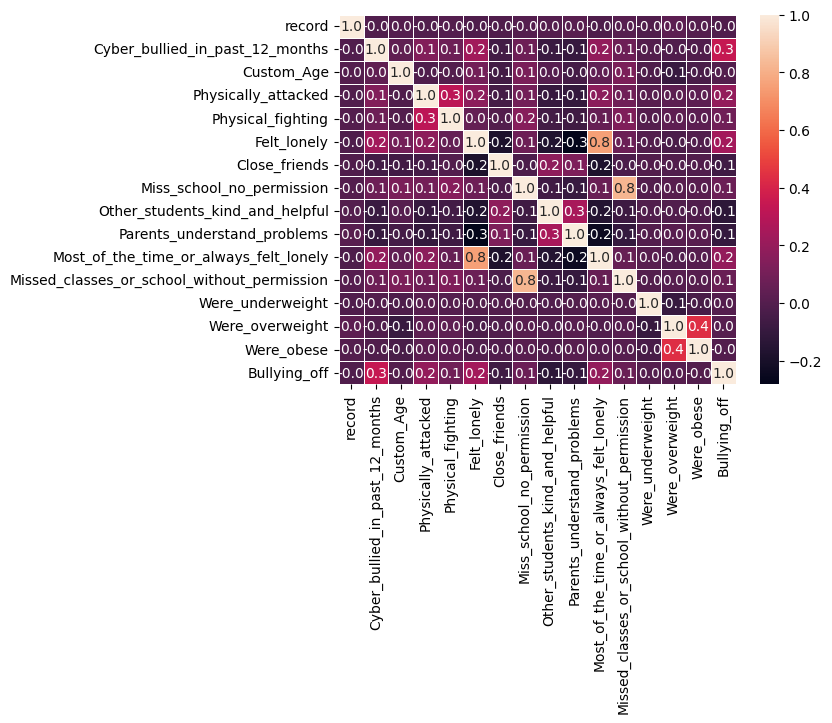

In [ ]:
# plot da matriz de correlação
plot = sns.heatmap(dfcorrelacao, annot = True, fmt=".1f", linewidths=.6)
plot

In [ ]:
#correlação para sexos separados
df_sep_sex_correlacao = df_sep_sex.corr()
df_sep_sex_correlacao 

,record,Cyber_bullied_in_past_12_months,Custom_Age,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,Bullying_off,Sex_Female,Sex_Male
record,1.00000,-0.00823,0.00239,-0.01080,-0.00105,-0.01724,-0.01284,-0.00040,0.00309,0.01094,-0.02004,0.00672,-0.01293,0.02498,0.00040,-0.01194,0.00845,-0.00750
Cyber_bullied_in_past_12_months,-0.00823,1.00000,0.03747,0.14299,0.07570,0.23104,-0.05214,0.07534,-0.08357,-0.09219,0.18664,0.07541,-0.00438,-0.01510,-0.01227,0.34201,0.13569,-0.13699
Custom_Age,0.00239,0.03747,1.00000,-0.01409,-0.00609,0.09430,-0.05849,0.11621,0.00792,-0.04779,0.04285,0.12113,-0.01840,-0.08704,-0.03263,-0.00635,-0.00736,0.00911
Physically_attacked,-0.01080,0.14299,-0.01409,1.00000,0.31358,0.17084,-0.05006,0.09708,-0.09193,-0.10473,0.16779,0.08668,0.01295,0.02340,0.02460,0.18978,-0.04119,0.03562
Physical_fighting,-0.00105,0.07570,-0.00609,0.31358,1.00000,0.04963,-0.00607,0.15243,-0.05601,-0.06954,0.05540,0.13076,0.00138,0.02886,0.02211,0.08457,-0.16660,0.16163
Felt_lonely,-0.01724,0.23104,0.09430,0.17084,0.04963,1.00000,-0.18510,0.07556,-0.17043,-0.28214,0.75413,0.07122,-0.00517,-0.02919,-0.00998,0.23543,0.26269,-0.26314
Close_friends,-0.01284,-0.05214,-0.05849,-0.05006,-0.00607,-0.18510,1.00000,-0.02296,0.17630,0.12750,-0.17729,-0.02441,-0.00389,-0.00733,-0.00960,-0.06209,-0.05071,0.05558
Miss_school_no_permission,-0.00040,0.07534,0.11621,0.09708,0.15243,0.07556,-0.02296,1.00000,-0.06195,-0.09066,0.06821,0.82450,-0.00519,0.01220,0.01290,0.06846,-0.03604,0.03070
Other_students_kind_and_helpful,0.00309,-0.08357,0.00792,-0.09193,-0.05601,-0.17043,0.17630,-0.06195,1.00000,0.25367,-0.15842,-0.07410,-0.00847,-0.00704,-0.01656,-0.12688,-0.02198,0.02520
Parents_understand_problems,0.01094,-0.09219,-0.04779,-0.10473,-0.06954,-0.28214,0.12750,-0.09066,0.25367,1.00000,-0.24002,-0.10069,-0.00271,0.01287,0.01144,-0.10130,-0.03753,0.03999


<Axes: >

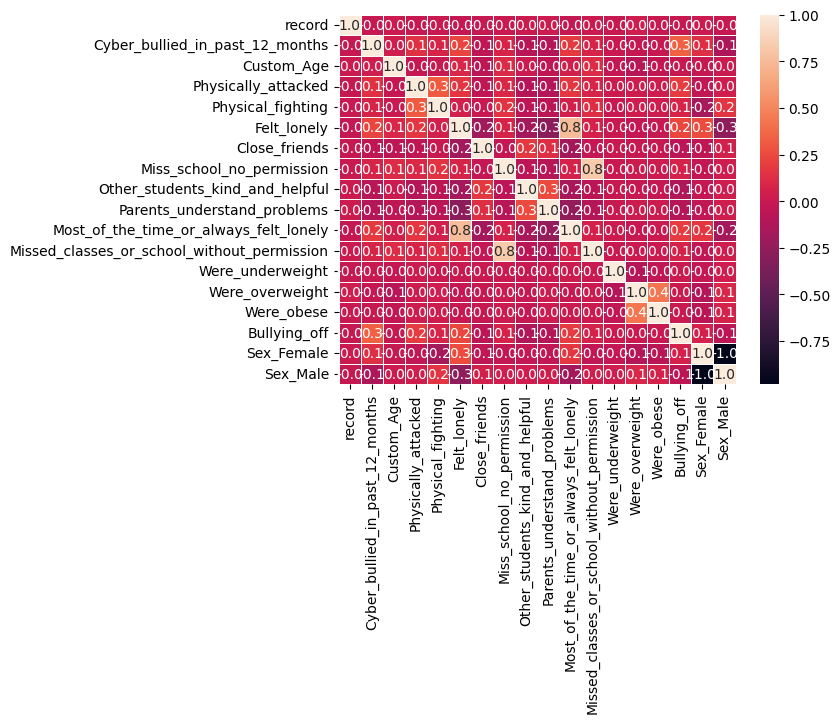

In [ ]:
# plot da matriz de correlação

plot = sns.heatmap(df_sep_sex_correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

### Matriz de correlação por Bullying off

In [ ]:
# selecionando as 5 maiores e menores correlações com a variável "bullying off" 
top_corr1 = dfcorrelacao['Bullying_off'].nlargest(10)
bottom_corr1 = dfcorrelacao['Bullying_off'].nsmallest(8)

print("Variáveis mais correlacionadas:\n", top_corr1)
print("\nVariáveis menos correlacionadas:\n", bottom_corr1)


Variáveis mais correlacionadas:
 Bullying_off                                  1.00000
Cyber_bullied_in_past_12_months               0.34201
Felt_lonely                                   0.23543
Most_of_the_time_or_always_felt_lonely        0.19292
Physically_attacked                           0.18978
Physical_fighting                             0.08457
Miss_school_no_permission                     0.06846
Missed_classes_or_school_without_permission   0.06762
Were_overweight                               0.00620
Were_underweight                              0.00319
Name: Bullying_off, dtype: float64

Variáveis menos correlacionadas:
 Other_students_kind_and_helpful   -0.12688
Parents_understand_problems       -0.10130
Close_friends                     -0.06209
record                            -0.01194
Custom_Age                        -0.00635
Were_obese                        -0.00247
Were_underweight                   0.00319
Were_overweight                    0.00620
Name: Bullyin

In [ ]:
# selecionando as 5 maiores e menores correlações com a variável "bullying off" para sexos separados
top_corr2 = df_sep_sex_correlacao['Bullying_off'].nlargest(10)
bottom_corr2 = df_sep_sex_correlacao['Bullying_off'].nsmallest(8)

print("Variáveis mais correlacionadas:\n", top_corr2)
print("\nVariáveis menos correlacionadas:\n", bottom_corr2)


Variáveis mais correlacionadas:
 Bullying_off                                  1.00000
Cyber_bullied_in_past_12_months               0.34201
Felt_lonely                                   0.23543
Most_of_the_time_or_always_felt_lonely        0.19292
Physically_attacked                           0.18978
Physical_fighting                             0.08457
Miss_school_no_permission                     0.06846
Missed_classes_or_school_without_permission   0.06762
Sex_Female                                    0.05620
Were_overweight                               0.00620
Name: Bullying_off, dtype: float64

Variáveis menos correlacionadas:
 Other_students_kind_and_helpful   -0.12688
Parents_understand_problems       -0.10130
Close_friends                     -0.06209
Sex_Male                          -0.05817
record                            -0.01194
Custom_Age                        -0.00635
Were_obese                        -0.00247
Were_underweight                   0.00319
Name: Bullyin

### Matriz de correlação por Cyber_bullied_in_past_12_months

In [ ]:
# selecionando as 5 maiores e menores correlações com a variável "Cyber bullying" 
top_corr3 = dfcorrelacao['Cyber_bullied_in_past_12_months'].nlargest(10)
bottom_corr3 = dfcorrelacao['Cyber_bullied_in_past_12_months'].nsmallest(5)

print("Variáveis mais correlacionadas:\n", top_corr3)
print("\nVariáveis menos correlacionadas:\n", bottom_corr3)

Variáveis mais correlacionadas:
 Cyber_bullied_in_past_12_months                1.00000
Bullying_off                                   0.34201
Felt_lonely                                    0.23104
Most_of_the_time_or_always_felt_lonely         0.18664
Physically_attacked                            0.14299
Physical_fighting                              0.07570
Missed_classes_or_school_without_permission    0.07541
Miss_school_no_permission                      0.07534
Custom_Age                                     0.03747
Were_underweight                              -0.00438
Name: Cyber_bullied_in_past_12_months, dtype: float64

Variáveis menos correlacionadas:
 Parents_understand_problems       -0.09219
Other_students_kind_and_helpful   -0.08357
Close_friends                     -0.05214
Were_overweight                   -0.01510
Were_obese                        -0.01227
Name: Cyber_bullied_in_past_12_months, dtype: float64


In [ ]:
# selecionando as 5 maiores e menores correlações com a variável "Cyber bullying" para sexos separados
top_corr4 = df_sep_sex_correlacao['Cyber_bullied_in_past_12_months'].nlargest(10)
bottom_corr4 = df_sep_sex_correlacao['Cyber_bullied_in_past_12_months'].nsmallest(5)

print("Variáveis mais correlacionadas:\n", top_corr4)
print("\nVariáveis menos correlacionadas:\n", bottom_corr4)

Variáveis mais correlacionadas:
 Cyber_bullied_in_past_12_months               1.00000
Bullying_off                                  0.34201
Felt_lonely                                   0.23104
Most_of_the_time_or_always_felt_lonely        0.18664
Physically_attacked                           0.14299
Sex_Female                                    0.13569
Physical_fighting                             0.07570
Missed_classes_or_school_without_permission   0.07541
Miss_school_no_permission                     0.07534
Custom_Age                                    0.03747
Name: Cyber_bullied_in_past_12_months, dtype: float64

Variáveis menos correlacionadas:
 Sex_Male                          -0.13699
Parents_understand_problems       -0.09219
Other_students_kind_and_helpful   -0.08357
Close_friends                     -0.05214
Were_overweight                   -0.01510
Name: Cyber_bullied_in_past_12_months, dtype: float64


# 2. Faça um comparativo dos bullyings sofridos por gênero, plote os resultados (histograma e boxplot).


### Analisando medidas das colunas de sexo

In [ ]:
#Criando um dataframe para cada um dos sexos, para facilitar na elaboração dos gráficos.

df_masc = df.copy()
df_masc = df[df['Sex']=='Male']

In [ ]:
df_masc.shape

(27083, 17)

In [ ]:
df_fem = df.copy()
df_fem = df[df['Sex']=='Female']

In [ ]:
df_fem.shape

(29362, 17)

### Plotando gráficos

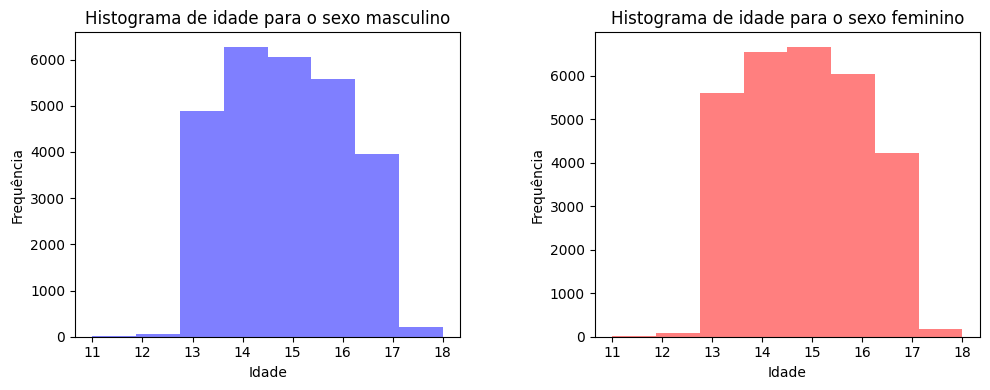

In [ ]:
#Histograma de idade para os sexos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc['Custom_Age'], bins=8, color='blue', alpha=0.5)
ax1.set_xlabel('Idade')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de idade para o sexo masculino')

ax2.hist(df_fem['Custom_Age'], bins=8, color='red', alpha=0.5)
ax2.set_xlabel('Idade')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de idade para o sexo feminino')

plt.tight_layout(w_pad = 5)
plt.show()

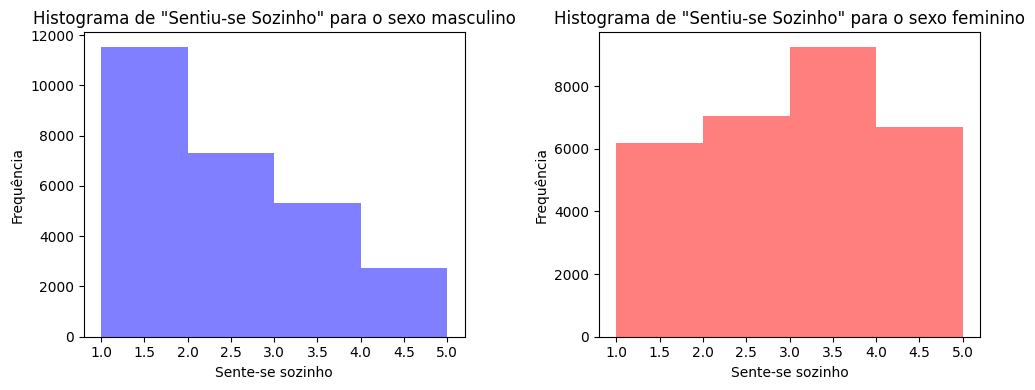

In [ ]:
#Histograma de Felt lonely  para os sexos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc['Felt_lonely'], bins=4, color='blue', alpha=0.5)
ax1.set_xlabel('Sente-se sozinho')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de "Sentiu-se Sozinho" para o sexo masculino')

ax2.hist(df_fem['Felt_lonely'], bins=4, color='red', alpha=0.5)
ax2.set_xlabel('Sente-se sozinho')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de "Sentiu-se Sozinho" para o sexo feminino')

plt.tight_layout(w_pad = 5)
plt.show()

Dividindo para quem sofreu cyber e bullying off


In [ ]:
#criando um data frame para cyber e bullying off por sexo para realizar análises

df_masc_cyber = df_masc[df_masc['Cyber_bullied_in_past_12_months']==1]
df_masc_off = df_masc[df_masc['Bullying_off']==1]
df_fem_cyber = df_fem[df_fem['Cyber_bullied_in_past_12_months']==1]
df_fem_off = df_fem[df_fem['Bullying_off']==1]

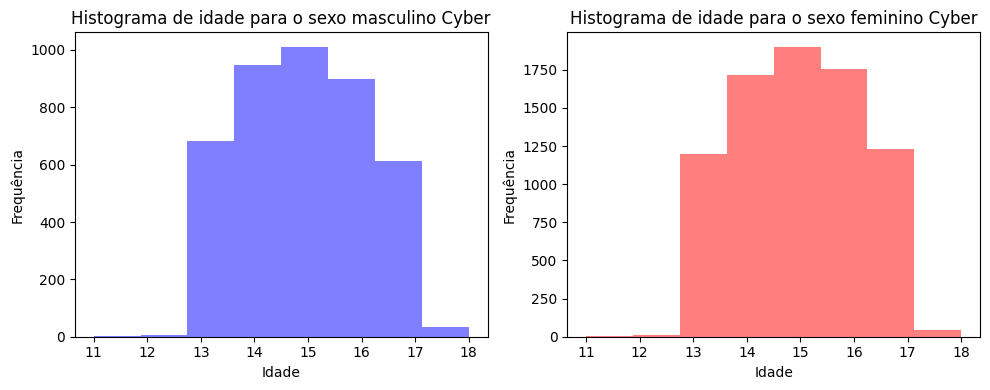

In [ ]:
#Histograma de idade para os sexos e cyber bullying

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc_cyber['Custom_Age'], bins=8, color='blue', alpha=0.5)
ax1.set_xlabel('Idade')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de idade para o sexo masculino Cyber')

ax2.hist(df_fem_cyber['Custom_Age'], bins=8, color='red', alpha=0.5)
ax2.set_xlabel('Idade')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de idade para o sexo feminino Cyber')

plt.tight_layout()
plt.show()

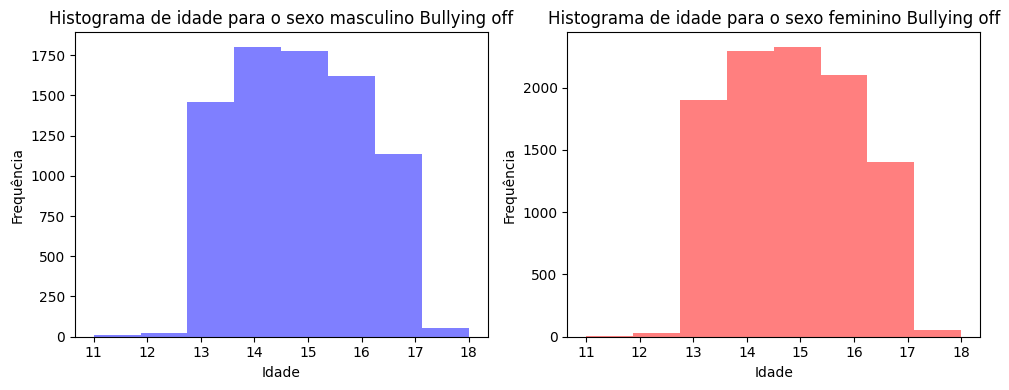

In [ ]:
#Histograma de idade para os sexos e bullying off

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc_off['Custom_Age'], bins=8, color='blue', alpha=0.5)
ax1.set_xlabel('Idade')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de idade para o sexo masculino Bullying off')

ax2.hist(df_fem_off['Custom_Age'], bins=8, color='red', alpha=0.5)
ax2.set_xlabel('Idade')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de idade para o sexo feminino Bullying off')

plt.tight_layout()
plt.show()

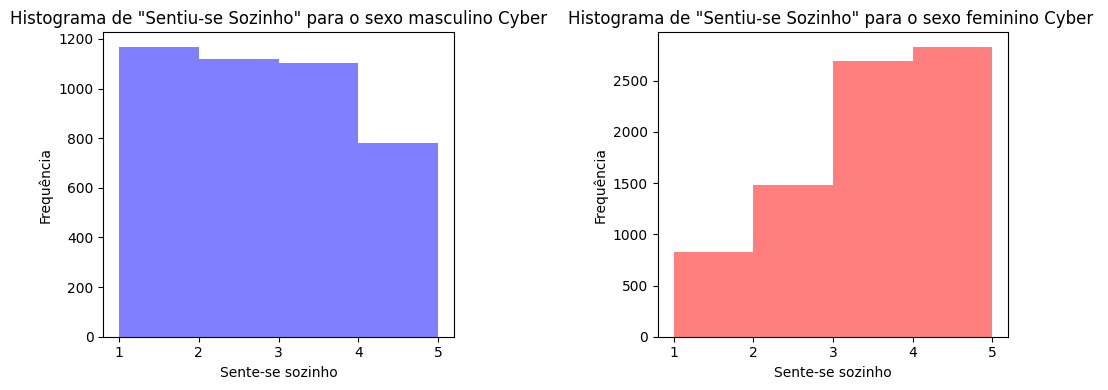

In [ ]:
#Histograma de Felt lonely  para os sexos e cyber 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc_cyber['Felt_lonely'], bins=4, color='blue', alpha=0.5)
ax1.set_xlabel('Sente-se sozinho')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de "Sentiu-se Sozinho" para o sexo masculino Cyber')

ax2.hist(df_fem_cyber['Felt_lonely'], bins=4, color='red', alpha=0.5)
ax2.set_xlabel('Sente-se sozinho')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de "Sentiu-se Sozinho" para o sexo feminino Cyber ')

plt.tight_layout(w_pad = 10)
plt.show()

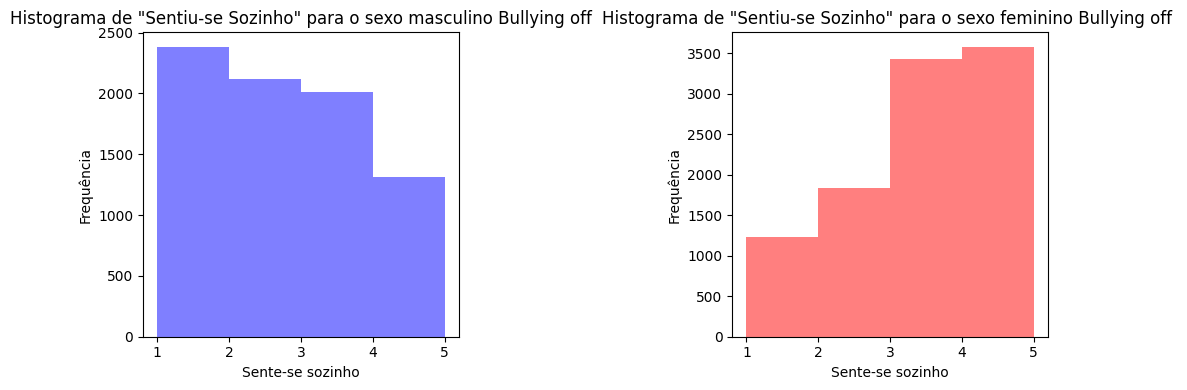

In [ ]:
#Histograma de Felt lonely  para os sexos e Bullying off 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc_off['Felt_lonely'], bins=4, color='blue', alpha=0.5)
ax1.set_xlabel('Sente-se sozinho')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de "Sentiu-se Sozinho" para o sexo masculino Bullying off')

ax2.hist(df_fem_off['Felt_lonely'], bins=4, color='red', alpha=0.5)
ax2.set_xlabel('Sente-se sozinho')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de "Sentiu-se Sozinho" para o sexo feminino Bullying off ')

plt.tight_layout(w_pad = 15)
plt.show()

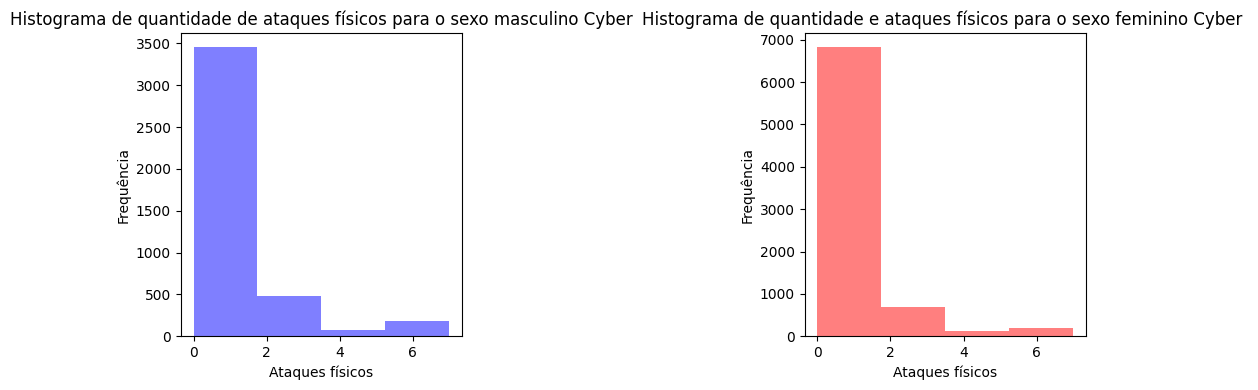

In [ ]:
#Histograma de Physically_attacked  para os sexos e cyber 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc_cyber['Physically_attacked'], bins=4, color='blue', alpha=0.5)
ax1.set_xlabel('Ataques físicos')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de quantidade de ataques físicos para o sexo masculino Cyber')

ax2.hist(df_fem_cyber['Physically_attacked'], bins=4, color='red', alpha=0.5)
ax2.set_xlabel('Ataques físicos')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de quantidade e ataques físicos para o sexo feminino Cyber ')

plt.tight_layout(w_pad = 20)
plt.show()

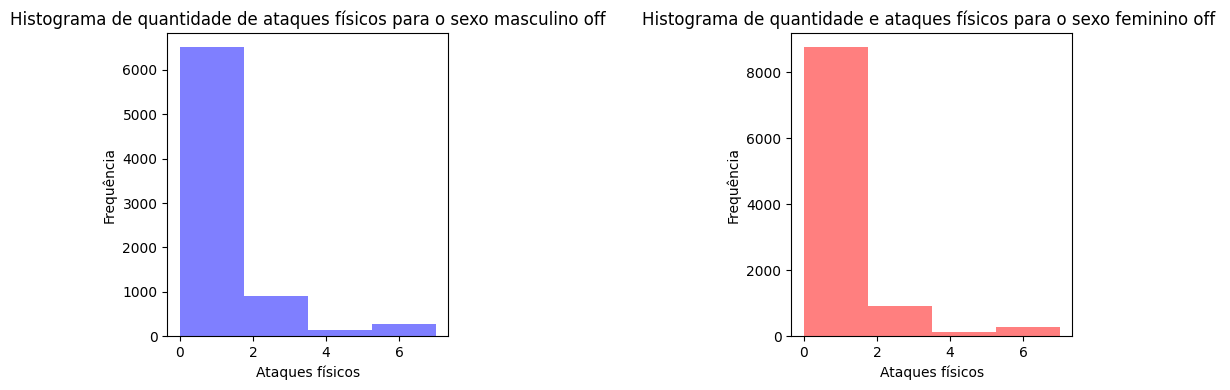

In [ ]:
#Histograma de Physically_attacked  para os sexos e bullying off

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc_off['Physically_attacked'], bins=4, color='blue', alpha=0.5)
ax1.set_xlabel('Ataques físicos')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de quantidade de ataques físicos para o sexo masculino off')

ax2.hist(df_fem_off['Physically_attacked'], bins=4, color='red', alpha=0.5)
ax2.set_xlabel('Ataques físicos')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de quantidade e ataques físicos para o sexo feminino off ')

plt.tight_layout(w_pad = 20)
plt.show()

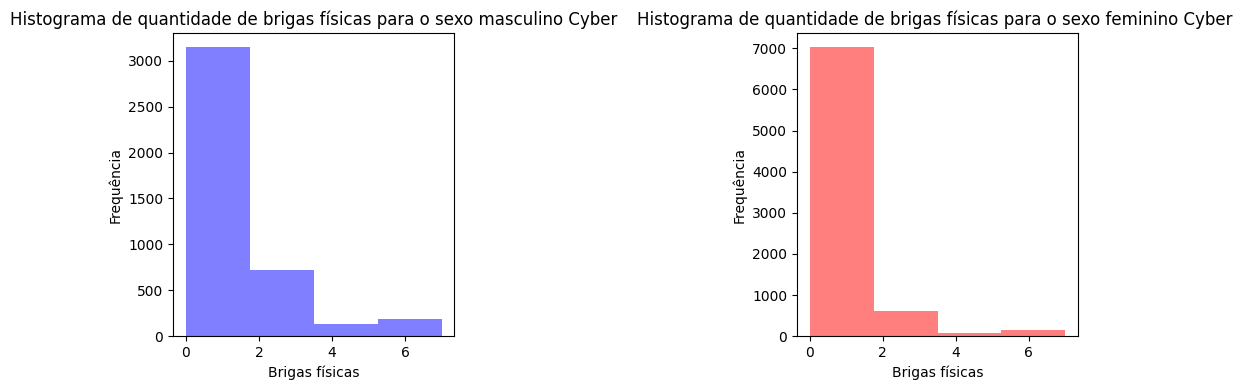

In [ ]:
#Histograma de Physical_fighting para os sexos e cyber 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc_cyber['Physical_fighting'], bins=4, color='blue', alpha=0.5)
ax1.set_xlabel('Brigas físicas')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de quantidade de brigas físicas para o sexo masculino Cyber')

ax2.hist(df_fem_cyber['Physical_fighting'], bins=4, color='red', alpha=0.5)
ax2.set_xlabel('Brigas físicas')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de quantidade de brigas físicas para o sexo feminino Cyber ')

plt.tight_layout(w_pad = 20)
plt.show()

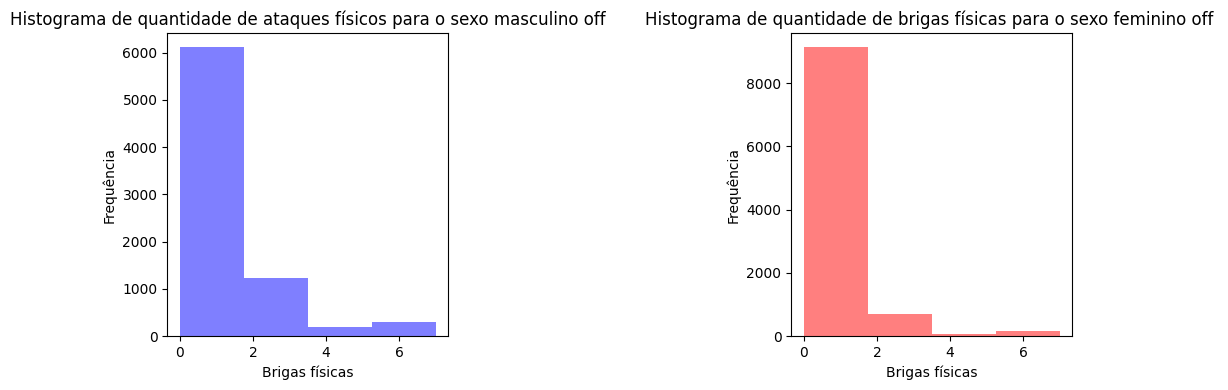

In [ ]:
#Histograma de Physical_fighting  para os sexos e bullying off

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_masc_off['Physical_fighting'], bins=4, color='blue', alpha=0.5)
ax1.set_xlabel('Brigas físicas')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de quantidade de ataques físicos para o sexo masculino off')

ax2.hist(df_fem_off['Physical_fighting'], bins=4, color='red', alpha=0.5)
ax2.set_xlabel('Brigas físicas')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma de quantidade de brigas físicas para o sexo feminino off ')

plt.tight_layout(w_pad = 20)
plt.show()

###Separando e organizando valores para o gráfico

In [ ]:
df_norm = df_sep_sex.copy()

lista_1 = ['Custom_Age', 'Physically_attacked', 'Physical_fighting', 'Felt_lonely', 'Close_friends', 'Miss_school_no_permission', 'Other_students_kind_and_helpful',
 'Parents_understand_problems', 'Most_of_the_time_or_always_felt_lonely', 'Missed_classes_or_school_without_permission', 'Sex_Female', 'Sex_Male','Cyber_bullied_in_past_12_months']

df_1 = df_norm.loc[:,lista_1]

In [ ]:
#Aqui vou ver quais colunas o meu modelo está utilizando.
lista = list(df_norm.columns)

##print(lista)

#Aqui eu seleciono quais variáveis eu vou utilizar. Tirei as informações sobre peso porque 20.000 estavam nan, e quando retirava elas, tirava muita informação da base
lista_1 = ['Custom_Age', 'Physically_attacked', 'Physical_fighting', 'Felt_lonely', 'Close_friends', 'Miss_school_no_permission', 'Other_students_kind_and_helpful',
 'Parents_understand_problems', 'Most_of_the_time_or_always_felt_lonely', 'Missed_classes_or_school_without_permission', 'Sex_Female', 'Sex_Male','Cyber_bullied_in_past_12_months']


lista_nan = ['Custom_Age', 'Physically_attacked', 'Physical_fighting', 'Felt_lonely', 'Close_friends', 'Miss_school_no_permission', 'Other_students_kind_and_helpful',
 'Parents_understand_problems', 'Most_of_the_time_or_always_felt_lonely', 'Missed_classes_or_school_without_permission']

df_1 = df_norm.loc[:,lista_1]

# contando valores nulos por coluna
null_counts = df_1.isnull().sum()

# imprimindo valores nulos por coluna
print("Valores nulos por coluna:")
print(null_counts)

df_1 = df_1.astype(float)

# Calcular a média da primeira coluna excluindo NaN
for coluna in lista_nan:

    media = df[coluna].mean()

    # Substituir valores NaN pela média
    df_1[coluna].fillna(media, inplace=True)

# contando valores nulos por coluna
null_counts = df_1.isnull().sum()

# imprimindo valores nulos por coluna
print("Valores nulos por coluna:")
print(null_counts)
#Retirar as linhas nan apenas quando não temos o sexo, ou os labels(bullying_off e cyberbullying)

#So retiro os nan aqui, onde já coloquei apenas as variáveis interessantes
df_1.dropna(inplace=True)

Valores nulos por coluna:
Custom_Age                                      108
Physically_attacked                             240
Physical_fighting                               268
Felt_lonely                                     366
Close_friends                                  1076
Miss_school_no_permission                      1864
Other_students_kind_and_helpful                1559
Parents_understand_problems                    2373
Most_of_the_time_or_always_felt_lonely          366
Missed_classes_or_school_without_permission    1864
Sex_Female                                        0
Sex_Male                                          0
Cyber_bullied_in_past_12_months                 571
dtype: int64
Valores nulos por coluna:
Custom_Age                                       0
Physically_attacked                              0
Physical_fighting                                0
Felt_lonely                                      0
Close_friends                                    0
Miss

###Visualização de quem sofreu bullying por gênero

In [ ]:
# Selecionar apenas as linhas com sex_male == 1
df_masc = df_1.loc[df_1['Sex_Male'] == 1].copy()

# Selecionar apenas as linhas com sex_female == 1
df_fem = df_1.loc[df_1['Sex_Female'] == 1].copy()

#Removo as features que não vou utilizar (O sexo e o bullying online que irá virar label.)
lista_1.remove('Cyber_bullied_in_past_12_months')
lista_1.remove('Sex_Male')
lista_1.remove('Sex_Female')

#Atribuo os labels para cada dataframe (feminino e masculino)
y_masc = df_masc.loc[:,'Cyber_bullied_in_past_12_months']
y_fem = df_fem.loc[:,'Cyber_bullied_in_past_12_months']

#Refaço o dataframe com as features que vou utilizar.
df_masc = df_masc.loc[:,lista_1]
df_fem = df_fem.loc[:,lista_1]

#Armazeno as features e os labels de cada dataframe em array

X_masc = np.array(df_masc.values)
y_masc = np.array(y_masc.values)

X_fem = np.array(df_fem.values)
y_fem = np.array(y_fem.values)

#Aqui conto a diferença entre exemplos com classe 0(sem bullying) e classe 1(bullying) como os números são muito discrepantes, irá prejudicar o modelo.
num_zeros_masc = np.count_nonzero(y_masc == 0)
num_ones_masc = np.count_nonzero(y_masc == 1)

dif_masc = num_zeros_masc - num_ones_masc

#Aqui conto a diferença entre exemplos com classe 0(sem bullying) e classe 1(bullying) como os números são muito discrepantes, irá prejudicar o modelo.
num_zeros_fem = np.count_nonzero(y_fem == 0)
num_ones_fem = np.count_nonzero(y_fem == 1)

dif_fem = num_zeros_fem - num_ones_fem

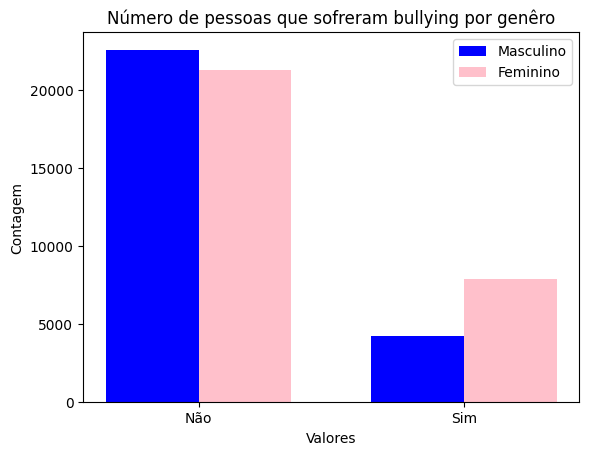

In [ ]:
# Contagem dos valores 0 e 1 para cada grupo
y_masc = y_masc.astype(int)
y_fem = y_fem.astype(int)

contagem_masc = np.bincount(y_masc)
contagem_fem = np.bincount(y_fem)

# Configurações do gráfico
labels = ['Não', 'Sim']
x = np.arange(len(labels))
width = 0.35

# Plotagem das barras
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, contagem_masc, width, label='Masculino', color='blue')
rects2 = ax.bar(x + width/2, contagem_fem, width, label='Feminino', color='pink')

# Configurações adicionais
ax.set_ylabel('Contagem')
ax.set_xlabel('Valores')
ax.set_title('Número de pessoas que sofreram bullying por genêro')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Exibição do gráfico
plt.show()

#3- Qual a média de idade das pessoas que sofreram bullying, análise outras variáveis não relevantes como (felt_lonely, close_friends e outras) podem ter influenciado ataques de bullying? O que pode ser representado como principal motivo de bullying?



In [ ]:
#Como classificamos como 11 quem tem 11 anos ou menos e como 18, quem tem 18 ou mais... Não apresenta a idade exata.
#Dessa forma, exclui-se os indivíduos com essas variáveis. 

idade_11 = (df['Custom_Age'] == 11).value_counts()
idade_18 = (df['Custom_Age'] == 18).value_counts()

print(idade_11)
print(idade_18)

df_idade = df.copy()

#Transformando quem tem idade de 11 ou 18 anos para número Nan
df_idade.loc[df_idade['Custom_Age'] == 11, 'Custom_Age'] = np.nan
df_idade.loc[df_idade['Custom_Age'] == 18, 'Custom_Age'] = np.nan

df_idade['Custom_Age'].unique()


False    56933
True        48
Name: Custom_Age, dtype: int64
False    56598
True       383
Name: Custom_Age, dtype: int64


array([13., 14., 16., 12., 15., nan, 17.])

In [ ]:
media_idade_offline = df_idade.loc[df_idade['Bullying_off'] == 1, 'Custom_Age'].mean()
media_idade_online = df_idade.loc[df_idade['Cyber_bullied_in_past_12_months'] == 1, 'Custom_Age'].mean()

print(f"Média de idade para Bullying offline: {media_idade_offline}")
print(f"Média de idade para Cyber Bullying: {media_idade_online}")


Média de idade para Bullying offline: 14.877997452511492
Média de idade para Cyber Bullying: 14.98774834437086


## A análise das váriaveis está acima, como apresentado. Já os principais motivos para bullying são aqueles que exibiram maior correlação, ou seja: 

1. Se sentir sozinho
2. Perder a escola/aula sem permissão
3. Ser ou não do sexo feminino
4. Briga física
5. Ataque físico
5. A própria variável de bullying, sendo offline ou cyber. 

#  4.  Construa um modelo de regressão linear que explique o bullying virtual e offline 

### Retirando valores nulos

In [ ]:
#Não posso fazer a regressão com dados Nan, primeiro vou excluir as colunas que não vou usar para classificar.
df_regressao = df_sep_sex.copy()

In [ ]:
df_regressao.columns

Index(['record', 'Cyber_bullied_in_past_12_months', 'Custom_Age',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'Were_underweight',
       'Were_overweight', 'Were_obese', 'Bullying_off', 'Sex_Female',
       'Sex_Male'],
      dtype='object')

In [ ]:
df_regressao = df_regressao.drop(['record','Custom_Age','Close_friends','Other_students_kind_and_helpful', 'Parents_understand_problems',
                                      'Most_of_the_time_or_always_felt_lonely','Other_students_kind_and_helpful', 'Parents_understand_problems','Missed_classes_or_school_without_permission', 'Were_underweight',
       'Were_overweight', 'Were_obese','Sex_Male'], axis=1)

In [ ]:
df_regressao.isnull().sum()

Cyber_bullied_in_past_12_months     571
Physically_attacked                 240
Physical_fighting                   268
Felt_lonely                         366
Miss_school_no_permission          1864
Bullying_off                          0
Sex_Female                            0
dtype: int64

In [ ]:
df_regressao.shape

(56981, 7)

In [ ]:
df_regressao = df_regressao.dropna()

In [ ]:
df_regressao.shape

(54155, 7)

In [ ]:
df_regressao.isnull().sum()

Cyber_bullied_in_past_12_months    0
Physically_attacked                0
Physical_fighting                  0
Felt_lonely                        0
Miss_school_no_permission          0
Bullying_off                       0
Sex_Female                         0
dtype: int64

###Preparando Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

#Modelo de previsão para Bullying off

X_off = df_regressao[['Cyber_bullied_in_past_12_months','Felt_lonely', 'Physically_attacked','Physical_fighting','Miss_school_no_permission','Sex_Female']]
y_off = df_regressao['Bullying_off']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_off, y_off, test_size=0.5, random_state= 0)


In [ ]:
#Treinando o classificador

# Criar o modelo de regressão logística
modelo_off = LogisticRegression()

# Treinar o modelo com os dados de treinamento
modelo_off.fit(X_train, y_train)

# Fazer previsões com os dados de teste
previsoes_off = modelo_off.predict(X_test)


In [ ]:
# Calcular a acurácia do modelo
acuracia_off = accuracy_score(y_test, previsoes_off)

print(f'Acurácia Bullying off: {acuracia_off}')


Acurácia Bullying off: 0.734692370189822


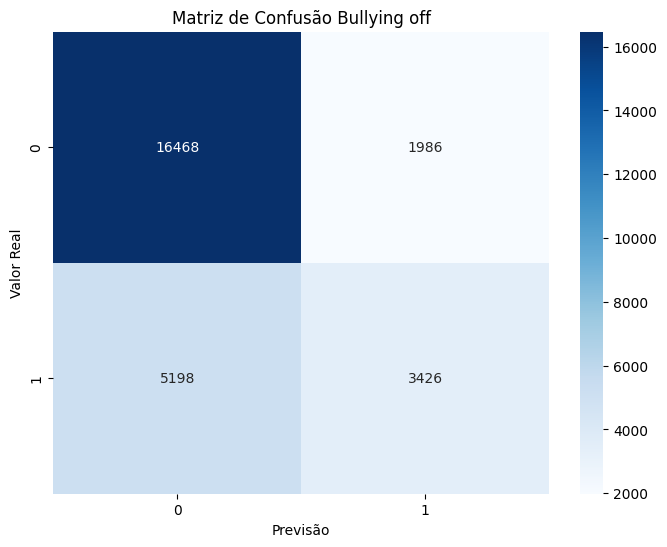

In [ ]:
# Calcular a matriz de confusão
from sklearn.metrics import confusion_matrix
matriz_confusao_off = confusion_matrix(y_test, previsoes_off)

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_off, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão Bullying off')
plt.show()


In [ ]:
#Modelo de previsão para Cyber Bullying

X_cyber = df_regressao[['Bullying_off','Felt_lonely', 'Physically_attacked','Physical_fighting','Miss_school_no_permission','Sex_Female']]
y_cyber = df_regressao['Cyber_bullied_in_past_12_months']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_cyber, y_cyber, test_size=0.5, random_state=0)

In [ ]:
#Treinando o classificador

# Criar o modelo de regressão logística
modelo_cyber = LogisticRegression()

# Treinar o modelo com os dados de treinamento
modelo_cyber.fit(X_train, y_train)

# Fazer previsões com os dados de teste
previsoes_cyber = modelo_cyber.predict(X_test)

In [ ]:
# Calcular a acurácia do modelo
acuracia_cyber = accuracy_score(y_test, previsoes_cyber)

print(f'Acurácia Cyber Bullying: {acuracia_cyber}')

Acurácia Cyber Bullying: 0.7962921929241451


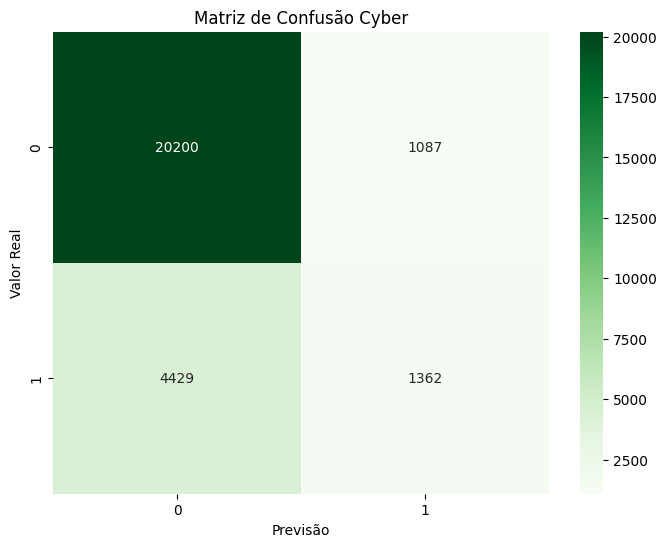

In [ ]:
# Calcular a matriz de confusão
from sklearn.metrics import confusion_matrix
matriz_confusao_cyber = confusion_matrix(y_test, previsoes_cyber)

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_cyber, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão Cyber')
plt.show()

###Coeficientes do modelo

In [ ]:
coeficientes_off = modelo_off.coef_
coeficientes_cyber = modelo_cyber.coef_

print(coeficientes_off)
print(coeficientes_cyber)

[[ 1.43652731  0.31557827  0.23649606  0.04251802  0.04329752 -0.07904998]]
[[1.44082066 0.27433201 0.12771564 0.07372173 0.09064388 0.58955051]]


In [ ]:
#Transformando os log ods em odds 


probabilidades_off = np.exp(coeficientes_off) 
probabilidades_cyber = np.exp(coeficientes_cyber)

print(probabilidades_off)
print(probabilidades_cyber)

[[4.20606407 1.37105192 1.26680257 1.04343486 1.04424853 0.92399374]]
[[4.22416099 1.31565154 1.13622986 1.07650721 1.09487902 1.80317772]]


In [ ]:
#Organizando os coeficientes Offline
pd.DataFrame(coeficientes_off[0], 
             X_off.columns, columns = ['Coeficiente_Bullying_off']).sort_values(by = 'Coeficiente_Bullying_off', ascending = False)
    

,Coeficiente_Bullying_off
Cyber_bullied_in_past_12_months,1.43653
Felt_lonely,0.31558
Physically_attacked,0.23650
Miss_school_no_permission,0.04330
Physical_fighting,0.04252
Sex_Female,-0.07905


In [ ]:
#Organizando os coeficientes Cyber 
pd.DataFrame(coeficientes_cyber[0], 
             X_cyber.columns, columns = ['Coeficiente_Cyber_Bullying']).sort_values(by = 'Coeficiente_Cyber_Bullying', ascending = False)

,Coeficiente_Cyber_Bullying
Bullying_off,1.44082
Sex_Female,0.58955
Felt_lonely,0.27433
Physically_attacked,0.12772
Miss_school_no_permission,0.09064
Physical_fighting,0.07372


In [ ]:
#Organizando os Odds Bullying off 
pd.DataFrame(probabilidades_off[0], 
             X_off.columns, columns = ['"Probabilidades" Bullying_off']).sort_values(by = '"Probabilidades" Bullying_off', ascending = False)

,"""Probabilidades"" Bullying_off"
Cyber_bullied_in_past_12_months,4.20606
Felt_lonely,1.37105
Physically_attacked,1.26680
Miss_school_no_permission,1.04425
Physical_fighting,1.04343
Sex_Female,0.92399


In [ ]:
#Organizando os Odds Cyber Bullying

pd.DataFrame(probabilidades_cyber[0], 
             X_cyber.columns, columns = ['"Probabilidades" Cyber_Bullying']).sort_values(by = '"Probabilidades" Cyber_Bullying', ascending = False)


,"""Probabilidades"" Cyber_Bullying"
Bullying_off,4.22416
Sex_Female,1.80318
Felt_lonely,1.31565
Physically_attacked,1.13623
Miss_school_no_permission,1.09488
Physical_fighting,1.07651


In [ ]:
# Checando R
x = df_regressao[['Bullying_off','Felt_lonely', 'Physically_attacked','Physical_fighting','Miss_school_no_permission','Sex_Female']]
y = df_regressao[['Cyber_bullied_in_past_12_months']].astype('float')


x = sm.add_constant(x)

m1 = sm.OLS(y,x).fit()

m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Cyber_bullied_in_past_12_months   R-squared:                       0.155
Model:                                         OLS   Adj. R-squared:                  0.155
Method:                              Least Squares   F-statistic:                     1658.
Date:                             Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                                     17:29:00   Log-Likelihood:                -24109.
No. Observations:                            54155   AIC:                         4.823e+04
Df Residuals:                                54148   BIC:                         4.829e+04
Df Model:                                        6                                         
Covariance Type:                         nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0452      0.004    -10.145      0.000      -0.054      -0.036
Bullying_off                  0.2585      0.004     71.010      0.000       0.251       0.266
Felt_lonely                   0.0418      0.001     28.255      0.000       0.039       0.045
Physically_attacked           0.0214      0.002     12.986      0.000       0.018       0.025
Physical_fighting             0.0133      0.001      9.002      0.000       0.010       0.016
Miss_school_no_permission     0.0172      0.002      9.593      0.000       0.014       0.021
Sex_Female                    0.0789      0.003     22.997      0.000       0.072       0.086
==============================================================================
Omnibus:                     7152.119   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10439.767
Skew:                           1.073   Prob(JB):                         0.00
Kurtosis:                       3.131   Cond. No.                         9.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""